# Keras Regression Project - House sales prediction

Let's now apply our knowledge to a more realistic data set. Here we will also focus on feature engineering and cleaning our data!

## 1. The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/kc_house_data.csv')

## 2. EDA

In [3]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


Lets try visualise some data to understand it

C:\Users\pate8284\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

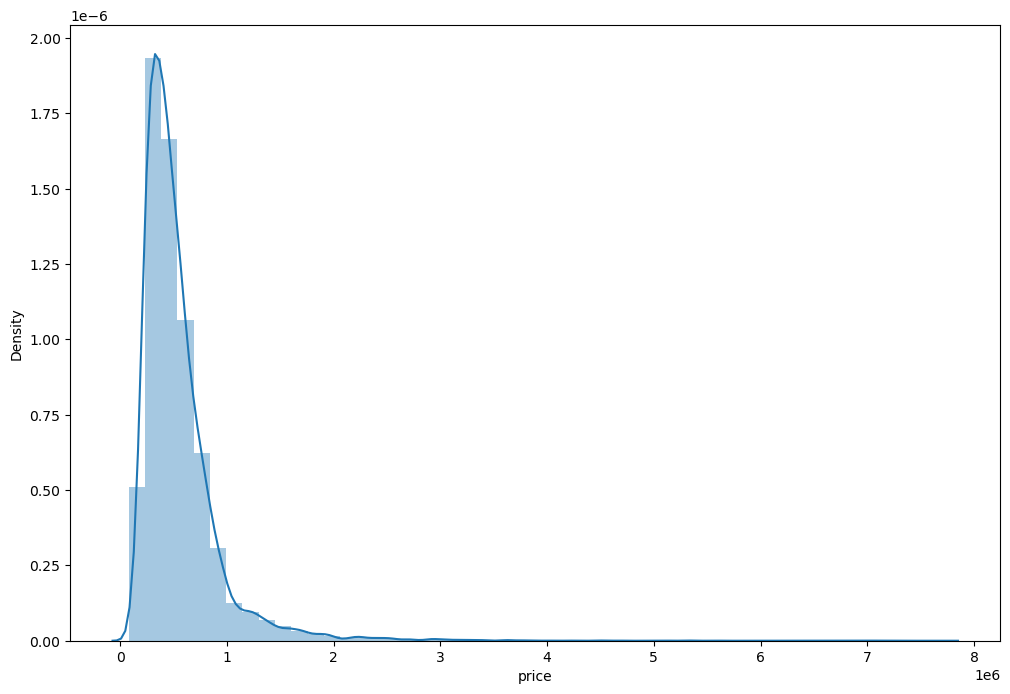

In [5]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

We can't really have 1.5 bedrooms so lets look at a count plot

C:\Users\pate8284\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

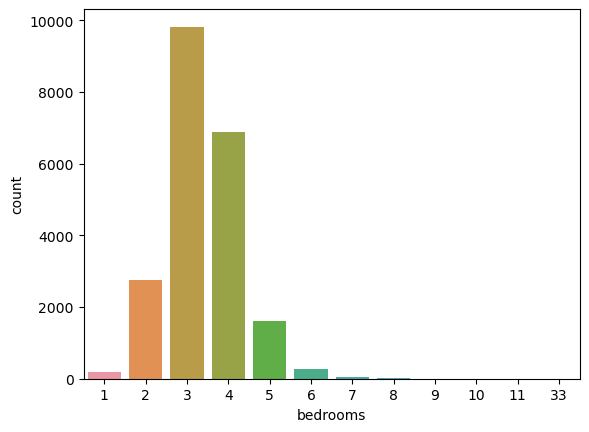

In [6]:
sns.countplot(df['bedrooms'])

We can also look at the correlation between price and the other labels to get an idea of what affects price

In [10]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

We can see sqft living has a very high correlation with price so lets plot it

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

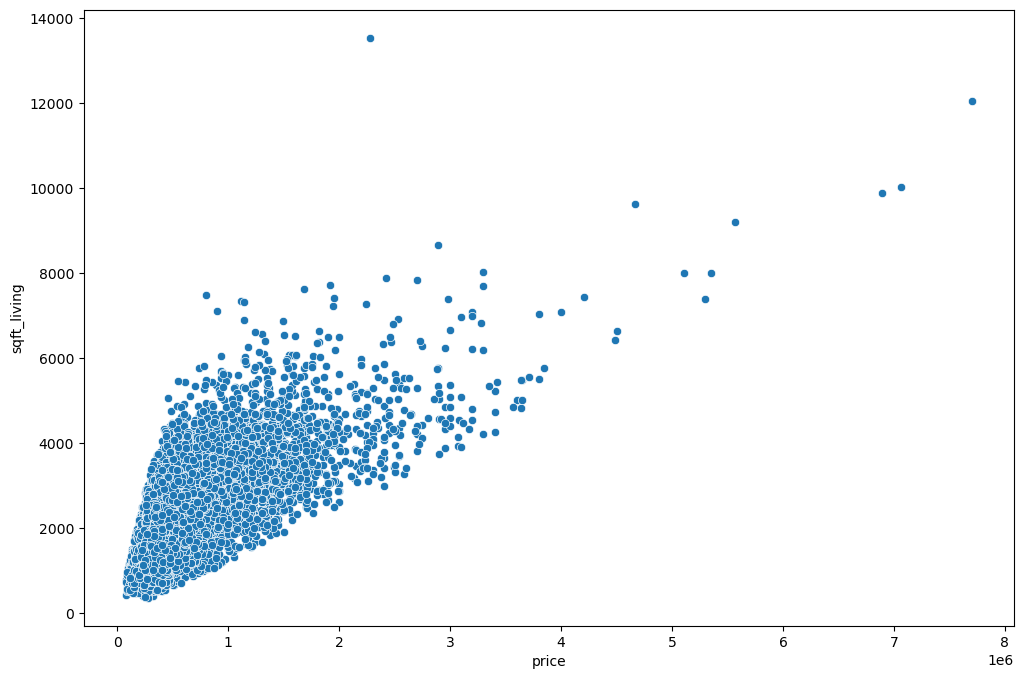

In [7]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

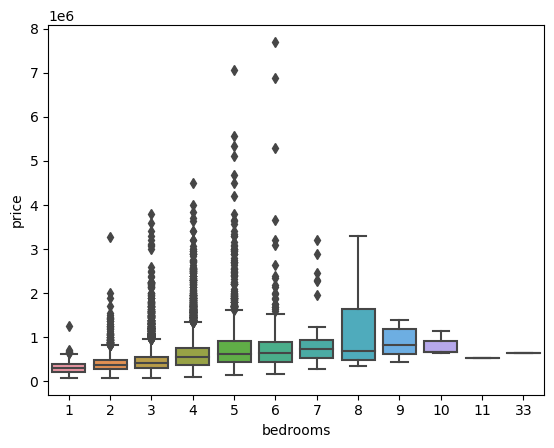

In [11]:
sns.boxplot(x='bedrooms',y='price',data=df)

From the countplot we can see that the majority of houses have between 2 and 6 bedrooms so here we can see a lot of variation in price

**Geographical Properties**

<AxesSubplot:xlabel='price', ylabel='long'>

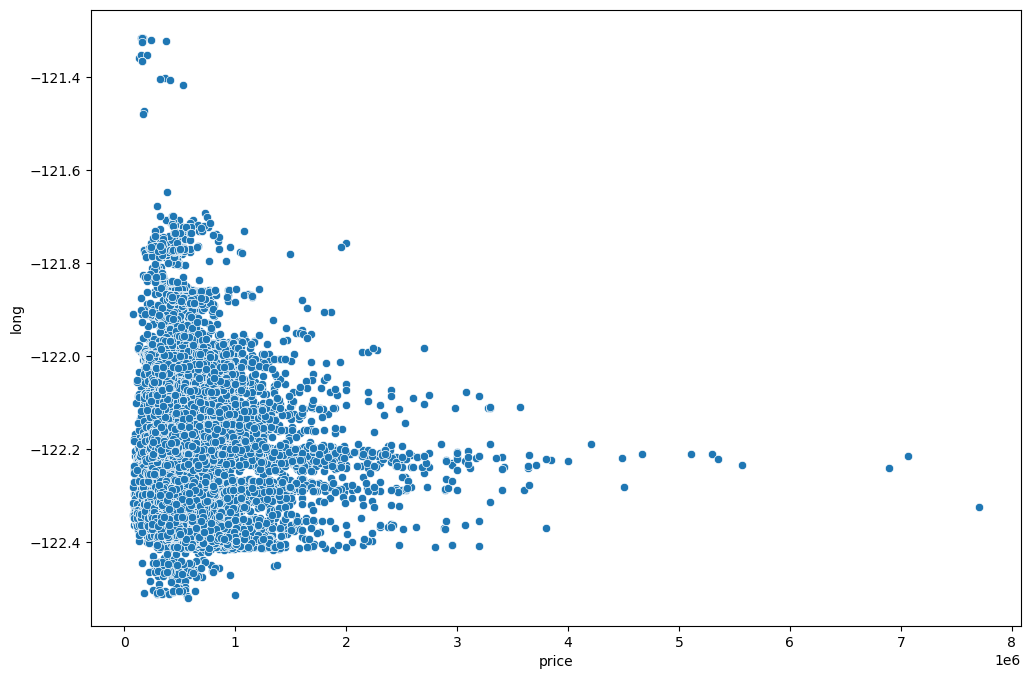

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

Looks like -122.2 has some expensive houses

<AxesSubplot:xlabel='price', ylabel='lat'>

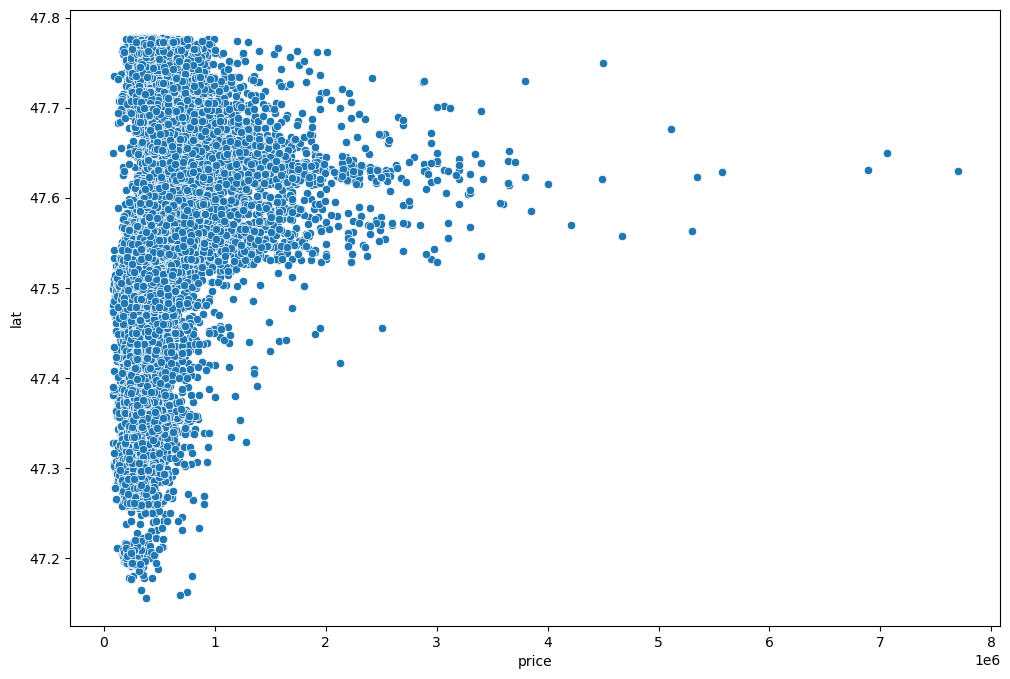

In [13]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

Looks like 47.65 has some expensive houses too

The actual map of King County, Seattle looks like this:


<img src="seattle.jpg" width="400" height="400" align="middle">


If we plot our data it looks like this:

<AxesSubplot:xlabel='long', ylabel='lat'>

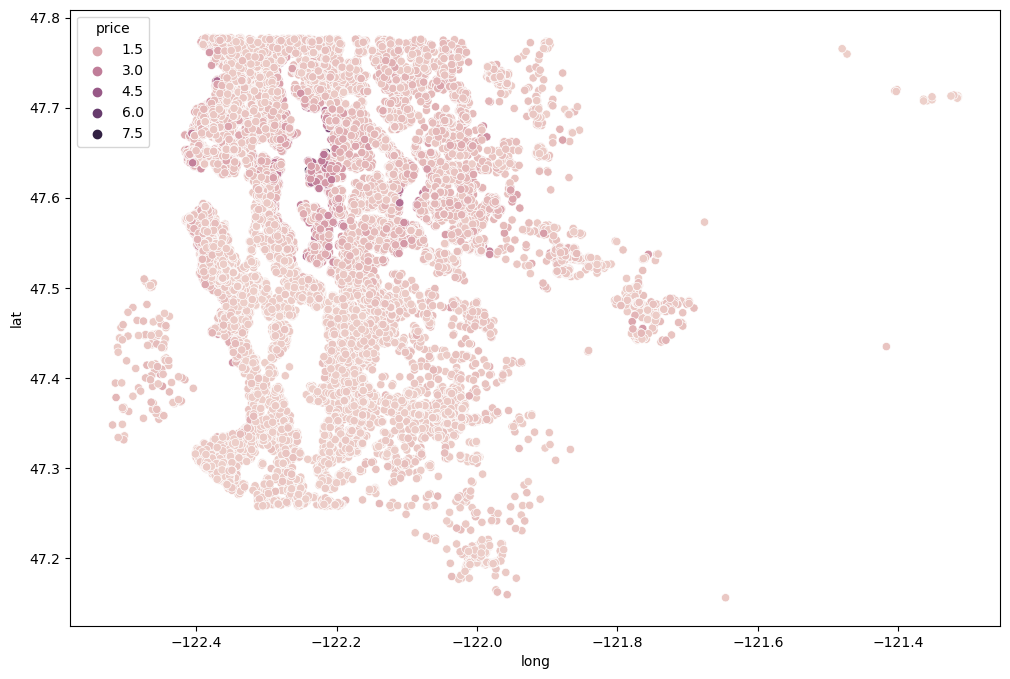

In [14]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

You can see at -122.2 and 47.6 we have a darker hue confirming that that area is expensive!
The map is still hard to read so lets try make it easier.

Lets look at the most expensive houses:

In [15]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


Lets get rid of the top 1% of houses since it skews our data quite heavily

In [13]:
len(df)*(0.01)

215.97

There are 215 houses in the top 1%

So lets now cut the table and only look at the houses that aren't included in this top 1%. We can do this by just finding the 215th house and only pick houses after that since our data frame is already sorted by price

In [19]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

<AxesSubplot:xlabel='long', ylabel='lat'>

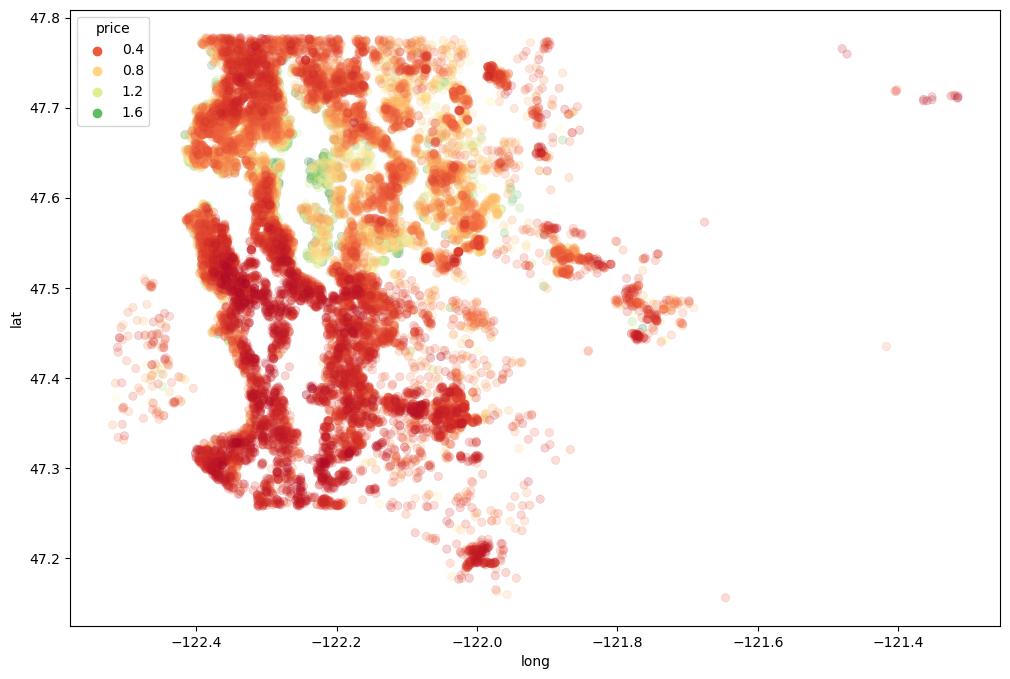

In [22]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.2)

That looks a lot clearer.

We can also see that the houses by the waterfront are more expensive. Lets look at this:

**Other Features**

<AxesSubplot:xlabel='waterfront', ylabel='price'>

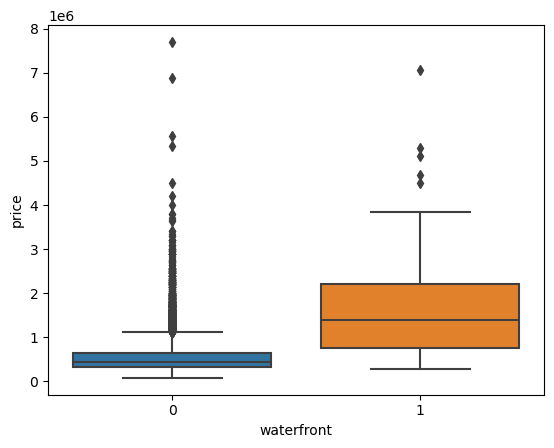

In [24]:
sns.boxplot(x='waterfront',y='price',data=df)

It looks like if you're on the waterfront then you're house tends to be more expensive

**Working with Feature Data**

In [25]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [27]:
df = df.drop('id',axis=1)

In [28]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Feature Engineering from Date**

In [30]:
df['date'] = pd.to_datetime(df['date'])
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [31]:
df['month'] = df['date'].apply(lambda date:date.month)
df['month']

0        10
1        12
2         2
3        12
4         2
         ..
21592     5
21593     2
21594     6
21595     1
21596    10
Name: month, Length: 21597, dtype: int64

In [32]:
df['year'] = df['date'].apply(lambda date:date.year)
df['year']

0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21592    2014
21593    2015
21594    2014
21595    2015
21596    2014
Name: year, Length: 21597, dtype: int64

In [34]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


<AxesSubplot:xlabel='year', ylabel='price'>

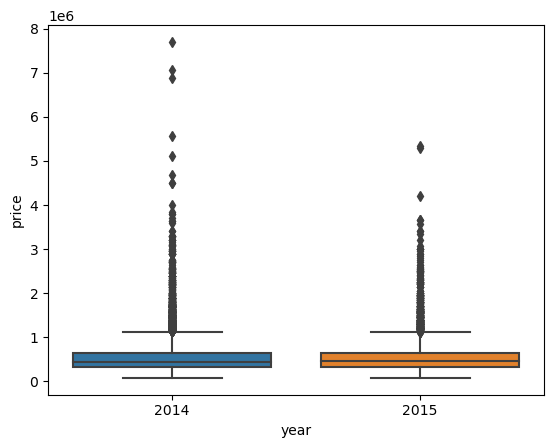

In [33]:
sns.boxplot(x='year',y='price',data=df)

Not much to see here so lets look at month

<AxesSubplot:xlabel='month', ylabel='price'>

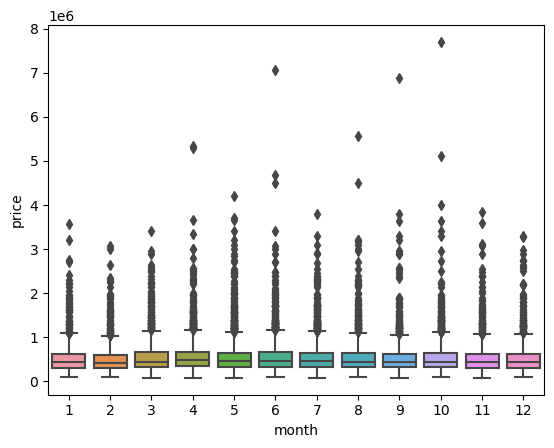

In [35]:
sns.boxplot(x='month',y='price',data=df)

<AxesSubplot:xlabel='month'>

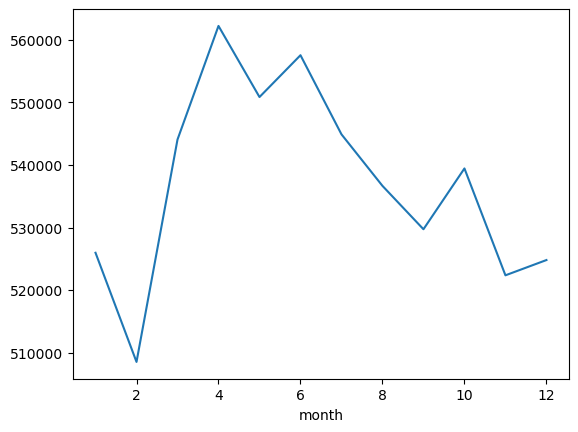

In [36]:
df.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

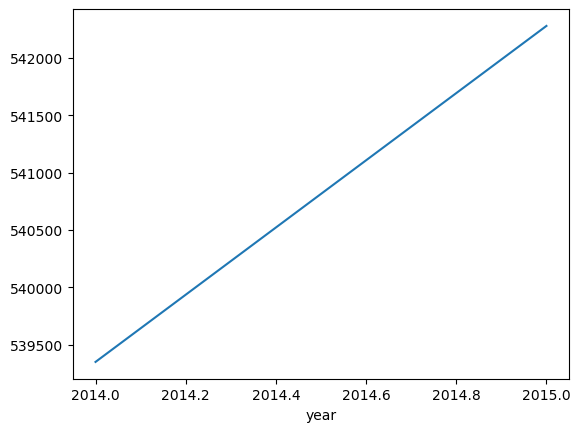

In [37]:
df.groupby('year').mean()['price'].plot()

In [38]:
df = df.drop('date',axis=1)

In [39]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

Lets look at zipcodes. Since if we left it as it is, our algorithm would think its a continuous variable with a larger zipcode meaning a larger value.

We might want to look at how many unique zipcodes there to see if its even worth converting it into a category 

In [41]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

There are 70 unique zipcodes! This is too much to convert so we can just drop it.

In [42]:
df = df.drop('zipcode',axis=1)

In [43]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [33]:
# could make sense due to scaling, higher should correlate to more value
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [47]:
df2 = pd.get_dummies(df['yr_renovated'])
df2

,0,1934,1940,1944,1945,1946,1948,1950,1951,1953,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21593,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21594,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21595,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Most of the values are 0! Meaning the house was not renovated. We could define all the 0's as not renovated and everything else as renovated. 

We could also assume that the higher the year, the more expensive the house will be since a more recent renovation will most likely increase the price of the house more. 

This is already evident in our data so we can leave it as is. 

In [44]:
df['sqft_basement'].value_counts()

0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

Again, this is similar to the renovated column so we shall leave it alone.

## 3. Scaling and Train Test Split

In [57]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

**Scaling**

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
scaler = MinMaxScaler()

In [62]:
X_train= scaler.fit_transform(X_train)

In [63]:
X_test = scaler.transform(X_test)

We only trasform on the test set because we don't want to assume any prior information about our test set

In [64]:
X_train.shape

(15117, 19)

In [65]:
X_test.shape

(6480, 19)

We have 19 features

## 4. Building the model

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

ModuleNotFoundError: No module named 'tensorflow'

Since we have 19 features we're going to use 19 neurons. 

We'll also use the recified linear activation function.

In [45]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

**Training the Model**

We use validation data here which will check our loss against the test data after each epoch of training

Batch size is just how we feed our data in. 
- The smaller the batch size, the longer it will take to fit the data but the less chance of overfitting because you're not passing  in your entire training set at once. 

In [46]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 1s 74us/sample - loss: 430228839929.3955 - val_loss: 418844493758.2617
Epoch 2/400
15117/15117 [==============================] - 0s 21us/sample - loss: 428253102583.9730 - val_loss: 411996069786.8642
Epoch 3/400
15117/15117 [==============================] - 0s 21us/sample - loss: 401401261499.3472 - val_loss: 351554389222.0839
Epoch 4/400
15117/15117 [==============================] - 0s 22us/sample - loss: 281418027052.1653 - val_loss: 178278463958.2815
Epoch 5/400
15117/15117 [==============================] - 0s 21us/sample - loss: 126127754575.5078 - val_loss: 95946680446.4198
Epoch 6/400
15117/15117 [==============================] - 0s 21us/sample - loss: 97670204498.9794 - val_loss: 93708013133.1160
Epoch 7/400
15117/15117 [==============================] - 0s 21us/sample - loss: 95694764310.6754 - val_loss: 91793937901.0370
Epoch 8/400
15117/15117 [=====================

In [47]:
losses = pd.DataFrame(model.history.history)

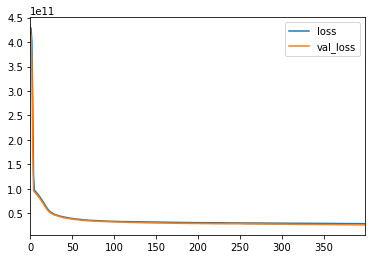

In [48]:
losses.plot()

We can see there's not much difference between our losses which is good. 

Also our line is not going upwards which means we could technically continue training the model without risk of overfitting. 

## 5. Evaluation on Test Data

In [49]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

**Predicting on Brand New Data**

In [50]:
X_test

array([[0.1       , 0.08      , 0.04239917, ..., 0.00887725, 0.63636364,
        0.        ],
       [0.3       , 0.36      , 0.17269907, ..., 0.00993734, 0.81818182,
        0.        ],
       [0.2       , 0.24      , 0.12512927, ..., 0.00547073, 0.90909091,
        0.        ],
       ...,
       [0.1       , 0.08      , 0.05584281, ..., 0.00506255, 1.        ,
        0.        ],
       [0.3       , 0.2       , 0.22233713, ..., 0.00774485, 0.09090909,
        1.        ],
       [0.3       , 0.32      , 0.27611169, ..., 0.0196531 , 0.45454545,
        0.        ]])

In [51]:
predictions = model.predict(X_test)

In [52]:
mean_absolute_error(y_test,predictions)

101666.74811137635

In [55]:
df['price'].mean()

540296.5735055795

We're off on average by about **$100k**. 

We can see that the average price of a house is around **$540k**. 

This means our error is around **20%** which is not very good

In [53]:
np.sqrt(mean_squared_error(y_test,predictions))

162549.26352210157

In [54]:
explained_variance_score(y_test,predictions)

0.8009472831860807

80% of our variance is being explained by the model which is okay.

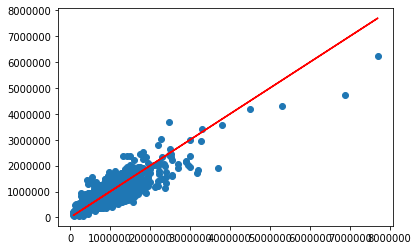

In [57]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

Our model is not very good at predicting those very expensive houses

In [58]:
errors = y_test.values.reshape(6480, 1) - predictions

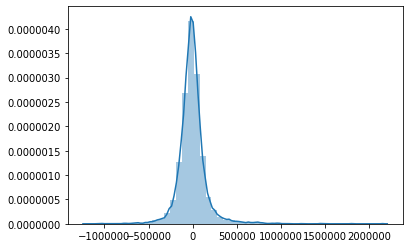

In [59]:
sns.distplot(errors)

-------------
### Predicting on a brand new house

In [69]:
#Lets take the first house
single_house = df.drop('price',axis=1).iloc[0]
single_house

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
month              10.0000
year             2014.0000
Name: 0, dtype: float64

We need to scale this sinc our model is trained on scaled data

In [86]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [87]:
single_house

array([[0.22222222, 0.08      , 0.11392405, 0.00433777, 0.        ,
        0.        , 0.        , 0.5       , 0.375     , 0.11654676,
        0.        , 0.47826087, 0.        , 0.56914119, 0.21760797,
        0.16510319, 0.00574235, 0.81818182, 0.        ]])

In [89]:
model.predict(single_house)

array([[283862.12]], dtype=float32)

So we predict this house to cost around **$284k**

In [90]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64

Our house actually costs around **$222k**